In [1]:
using TorJ: TorJ
using Plots;
gr();


[ Info: Precompiling TorJ [b45d83d7-7713-4074-bc63-b17549f248ea]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [2]:
using BSON: BSON
BSON.@load "TorJsample_data.bson" R_coords Z_coords ne_data Br_data Bz_data Bϕ_data
plasma = TorJ.Plasma(R_coords, Z_coords, ne_data, Br_data, Bz_data, Bϕ_data);


  0.008157 seconds (8.11 k allocations: 695.383 KiB)


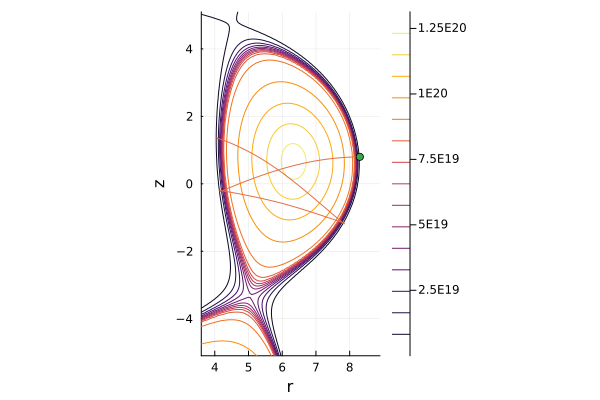

In [11]:
freq = 4.5E9
r0 = 8.30
ϕ0 = 0.0
z0 = 0.8
θ0 = -1.0 * π
nϕ0 = 0.0
t0 = 0.0
ω0 = 2π * freq

@time sol = TorJ.solve(plasma, r0, ϕ0, z0, nϕ0, θ0, freq, 1E2);

p = contour(R_coords, Z_coords, ne_data'; aspect_ratio = :equal, xlim = extrema(R_coords), ylim = extrema(Z_coords))
plot!(sol, idxs = (TorJ.r, TorJ.z), label = "")
scatter!([r0], [z0], label = "")


In [12]:
using Interact: Interact

Interact.@manipulate for
    #freq in LinRange(50E9, 100E9, 10),
    #r0 in LinRange(7.0, 9.0, 10),
    #z0 in LinRange(-5.0, 5.0, 11),
    θ0 in LinRange(-pi, pi, 360)

    sol = TorJ.solve(plasma, r0, ϕ0, z0, 0.0, θ0, freq, 1E2)

    p = contour(R_coords, Z_coords, ne_data'; aspect_ratio = :equal, xlim = extrema(R_coords), ylim = extrema(Z_coords))
    plot!(sol, idxs = (TorJ.r, TorJ.z), label = "")
    scatter!([r0], [z0], label = "")
end


WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 360, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(180), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/Users/meneghini/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/Users/meneghini/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/Users/meneghini/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/Users/meneghini/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/Users/meneghini/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00000002d033e720, Task (runnable) @0x00000002d033e720), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 12036975856, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-3.14159\",\"-3.